## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Configure pandas to display all columns
pd.set_option("display.max_columns", None)

df_cluster = pd.read_csv('bank_marketing_dataset.csv')

numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cluster.select_dtypes(include=['object']).columns
duration_col = ['duration']  # Column to log transform

df_cluster = df_cluster.drop(columns=['nr.employed', 'emp.var.rate'])

numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns

X_preprocessed_df = df_cluster.copy()
X_preprocessed_df['duration'] = np.log1p(df_cluster['duration'])

scaler = StandardScaler()
X_preprocessed_df[numerical_cols_c] = scaler.fit_transform(X_preprocessed_df[numerical_cols_c])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_preprocessed_df[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols), 
                                   index=X_preprocessed_df.index)

X_no_encoded = X_preprocessed_df.copy()

X_preprocessed_df.drop(columns=categorical_cols, inplace=True)

X_preprocessed_df = pd.concat([X_preprocessed_df, X_cat_encoded], axis=1)

print(X_preprocessed_df.shape)

X_preprocessed_df.head()

(41188, 63)


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,1.533034,0.431124,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.628993,-0.177114,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,0.274738,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.002309,-0.162669,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.533034,0.607534,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [2]:
prefixes = ['job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_of_week_', 'poutcome_', 'subscribed_']
one_hot_cols = [col for col in X_preprocessed_df.columns if any(col.startswith(prefix) for prefix in prefixes)]

In [3]:
continuous_data = X_preprocessed_df.drop(columns=one_hot_cols, axis=1)

## Self Organizing maps

Testing with MiniSom on the full dataset

C:\Users\valhk\AppData\Local\Temp\ipykernel_38624\657795215.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', np.unique(cluster_assignments).max() + 1)


KeyboardInterrupt: 

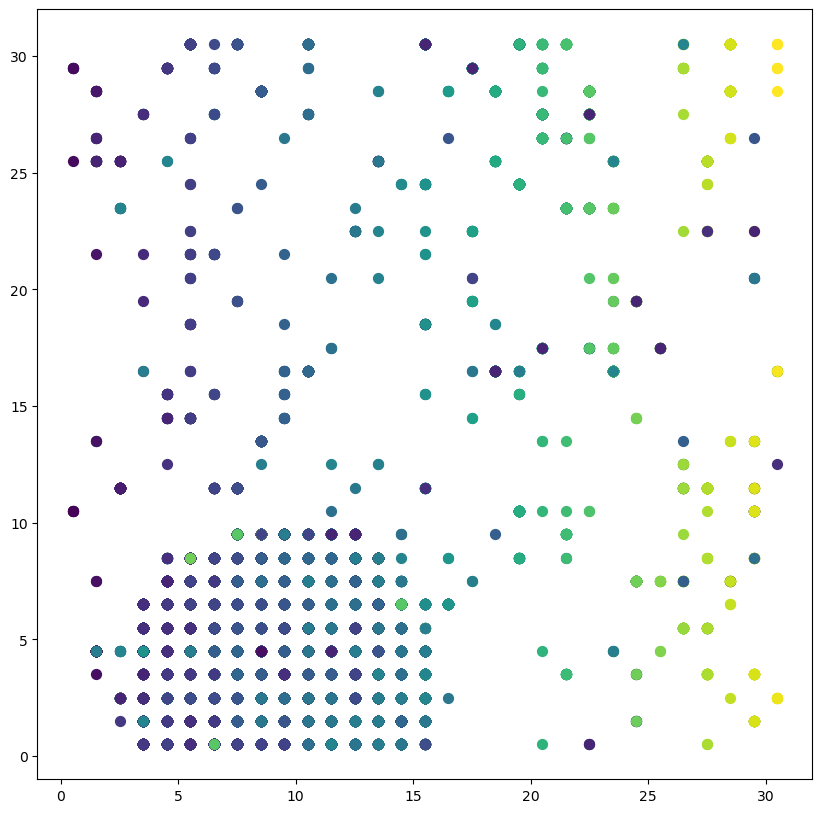

In [4]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Assuming X_preprocessed_df is your preprocessed dataset ready for clustering
data = X_preprocessed_df.values

# Initialize the SOM
som_side_dim = int(np.sqrt(5 * np.sqrt(data.shape[0])))  # heuristic for grid size
som = MiniSom(som_side_dim, som_side_dim, data.shape[1], sigma=1.0, learning_rate=0.5)

# Train the SOM
som.train_random(data, 1000)  # 1000 iterations

# Assign each data point to its closest cluster
win_map = som.win_map(data)
cluster_assignments = np.zeros(len(data), dtype=int)
for idx, x in enumerate(data):
    win_position = som.winner(x)
    cluster_assignments[idx] = win_position[0] * som_side_dim + win_position[1]

# Train the SOM
som.train_random(data, 1000)  # 1000 iterations

plt.figure(figsize=(10, 10))
colors = plt.cm.get_cmap('viridis', np.unique(cluster_assignments).max() + 1)

# Plot each data point in the SOM grid
for x, cluster in zip(data, cluster_assignments):
    w = som.winner(x)
    plt.scatter(w[0] + 0.5, w[1] + 0.5, color=colors(cluster), s=50)

plt.xlim([0, som_side_dim])
plt.ylim([0, som_side_dim])
plt.grid(True)
plt.title('SOM Clustering')
plt.show()


# If you want to add cluster assignments back to your dataframe
X_preprocessed_df['cluster'] = cluster_assignments

print(X_preprocessed_df.head())

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Number of clusters
num_clusters = len(np.unique(cluster_assignments))
print("Number of clusters:", num_clusters)

# Silhouette Score
silhouette_avg = silhouette_score(data, cluster_assignments)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data, cluster_assignments)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data, cluster_assignments)
print("Davies-Bouldin Index:", davies_bouldin)

Number of clusters: 366
Silhouette Score: -0.0985441564071999
Calinski-Harabasz Index: 98.6372858129908
Davies-Bouldin Index: 2.602321038264477


C:\Users\valhk\AppData\Local\Temp\ipykernel_30492\3112074440.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(targets))


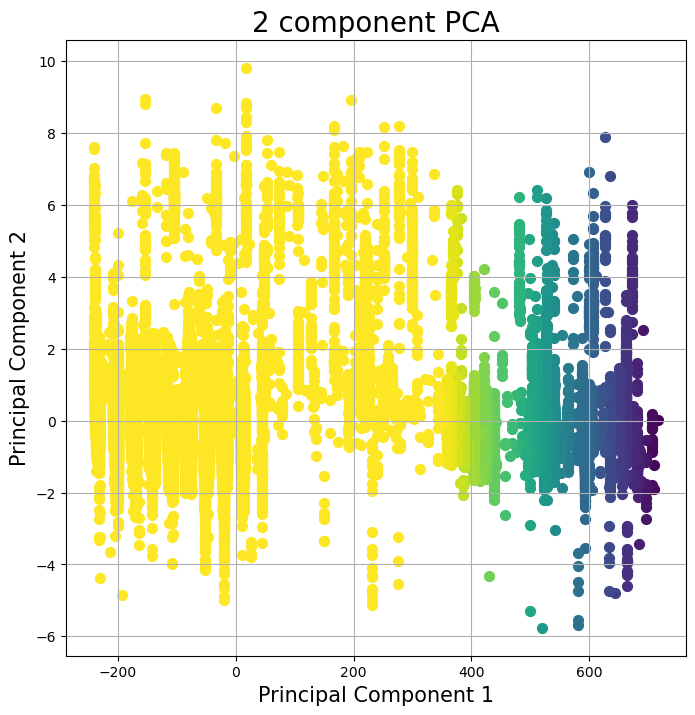

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_preprocessed_df)

# Create a DataFrame with the PCA results
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Include the cluster assignments into the DataFrame
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster': cluster_assignments})], axis=1)

# Set up the figure and axes for plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

# Determine the number of unique clusters
targets = np.unique(cluster_assignments)
colors = plt.cm.get_cmap('viridis', len(targets))

# Plot each cluster with different colors
for target in targets:
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=[colors(target)],
               s=50,
               label=f'Cluster {target}')
    
ax.grid()

plt.show()


Testing with MiniSom on the continuous variables dataset

In [ ]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Assuming X_preprocessed_df is your preprocessed dataset ready for clustering
data = continuous_data.values

# Initialize the SOM
som_side_dim = int(np.sqrt(5 * np.sqrt(data.shape[0])))  # heuristic for grid size
som = MiniSom(som_side_dim, som_side_dim, data.shape[1], sigma=1.0, learning_rate=0.5)

# Assign each data point to its closest cluster
win_map = som.win_map(data)
cluster_assignments = np.zeros(len(data), dtype=int)
for idx, x in enumerate(data):
    win_position = som.winner(x)
    cluster_assignments[idx] = win_position[0] * som_side_dim + win_position[1]

# Train the SOM
som.train_random(data, 1000)  # 1000 iterations

plt.figure(figsize=(10, 10))
colors = plt.cm.get_cmap('viridis', np.unique(cluster_assignments).max() + 1)

# Plot each data point in the SOM grid
for x, cluster in zip(data, cluster_assignments):
    w = som.winner(x)
    plt.scatter(w[0] + 0.5, w[1] + 0.5, color=colors(cluster), s=50)

plt.xlim([0, som_side_dim])
plt.ylim([0, som_side_dim])
plt.grid(True)
plt.title('SOM Clustering')
plt.show()

# If you want to add cluster assignments back to your dataframe
continuous_data['cluster'] = cluster_assignments

print(continuous_data.head())

C:\Users\valhk\AppData\Local\Temp\ipykernel_30492\1641112410.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', np.unique(cluster_assignments).max() + 1)


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Number of clusters
num_clusters = len(np.unique(cluster_assignments))
print("Number of clusters:", num_clusters)

# Silhouette Score
silhouette_avg = silhouette_score(data, cluster_assignments)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data, cluster_assignments)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data, cluster_assignments)
print("Davies-Bouldin Index:", davies_bouldin)

Number of clusters: 490
Silhouette Score: -0.07780013228104274
Calinski-Harabasz Index: 508.03440379075425
Davies-Bouldin Index: 1.5231852848961867


C:\Users\valhk\AppData\Local\Temp\ipykernel_30492\3265858401.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(targets))


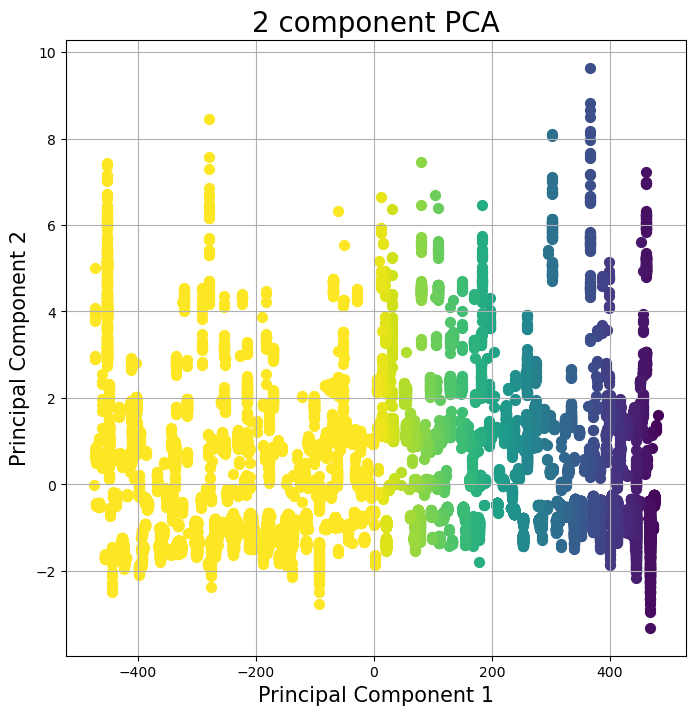

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(continuous_data)

# Create a DataFrame with the PCA results
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Include the cluster assignments into the DataFrame
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster': cluster_assignments})], axis=1)

# Set up the figure and axes for plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

# Determine the number of unique clusters
targets = np.unique(cluster_assignments)
colors = plt.cm.get_cmap('viridis', len(targets))

# Plot each cluster with different colors
for target in targets:
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=[colors(target)],
               s=50,
               label=f'Cluster {target}')
    
ax.grid()

plt.show()